In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#generate data
rng = np.random.RandomState(0)
X= 5*rng.rand(10000, 1)
y = np.sin(X).ravel()

#add noise to every 5th element [start:end:step]
y[::5] +=3 *(0.5-rng.rand(X.shape[0] // 5))

#data to be model
X_plot = np.linspace(0,5,1000000)[:, None]

In [35]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import Matern

#fit regression
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [Matern(length_scale=l, nu=2.5) for l in np.logspace(-2, 2, 5)]}
kr = GridSearchCV(KernelRidge(), cv=5, param_grid=param_grid, n_jobs=-1, 
                  verbose=100, return_train_score=False)

In [36]:
import time
from sklearn.externals import joblib

train_size = 100
t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
joblib.dump(kr, 'kernel_ridge_test.pkl')

kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s" 
      % kr_fit)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100,), dtype=float64).
Pickling array (shape=(80,), dtype=int32).
Pickling array (shape=(20,), dtype=int32).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100,), dtype=float64).
Pickling array (shape=(80,), dtype=int32).
Pickling array (shape=(20,), dtype=int32).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100,), dtype=float64).
Pickling array (shape=(80,), dtype=int32).
Pickling array (shape=(20,), dtype=int32).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100,), dtype=float64).
Pickling array (shape=(80,), dtype=int32).
Pickling array (shape=(20,), dtype=int32).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100,), dtype=float64).
Pickling array (shape=(80,), dtype=int32).
Pickling array (shape=(20,), dtype=int32).
[Parallel(n_jobs=-1)]: Done   1 tasks 

In [37]:
#predict
t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s" 
      % (X_plot.shape[0], kr_predict))

KRR prediction for 1000000 inputs in 14.530 s


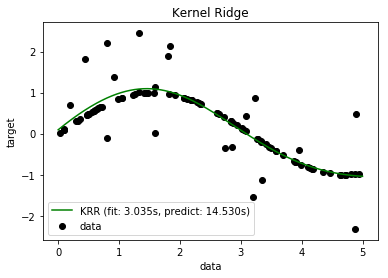

In [38]:
%matplotlib inline

# Look at the results
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()


KRR prediction for 1000000 inputs in 6.222 s


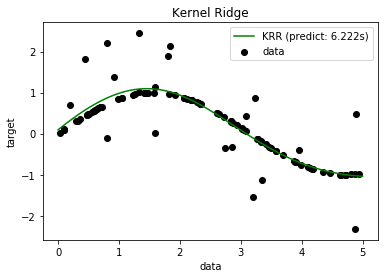

In [4]:
import time

from sklearn.externals import joblib
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import Matern

%matplotlib inline

kr = joblib.load('kernel_ridge_test.pkl')

#predict
t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s" 
      % (X_plot.shape[0], kr_predict))


# Look at the results
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (predict: %.3fs)' % (kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()